In [5]:
x, y = var('x y')
solve([2*x - x^2 - x*y, -y + x*y], x, y)

[[x == 0, y == 0], [x == 2, y == 0], [x == 1, y == 1]]

In [7]:
x, y = var('x y')
f = (2*x - x^2 - x*y, -y + x*y)
jac = jacobian(f, (x, y))
A1 = jac.subs(x = 0, y = 0)
A1

[ 2  0]
[ 0 -1]

In [8]:
x, y = var('x y')
f = (2*x - x^2 - x*y, -y + x*y)
jac = jacobian(f, (x, y))
A2 = jac.subs(x = 2, y = 0)
A2

[-2 -2]
[ 0  1]

In [9]:
x, y = var('x y')
f = (2*x - x^2 - x*y, -y + x*y)
jac = jacobian(f, (x, y))
A3 = jac.subs(x = 1, y = 1)
A3

[-1 -1]
[ 1  0]

In [10]:
A1.eigenvalues()
#saddle and unstable

[-1, 2]

In [11]:
A2.eigenvalues()
#saddle and unstable

[-2, 1]

In [12]:
A3.eigenvalues()
#focus and stable because real part is negative

[-1/2*I*sqrt(3) - 1/2, 1/2*I*sqrt(3) - 1/2]

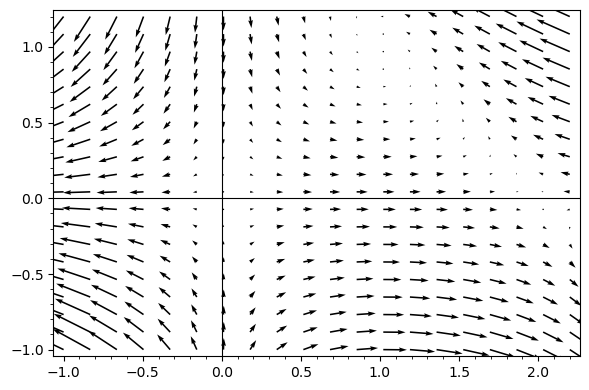

In [16]:
x, y = var('x y')
f = (2*x - x^2 - x*y, -y + x*y)
plot_vector_field((f[0], f[1]), (x, -1, 2.2), (y, -1, 1.2))

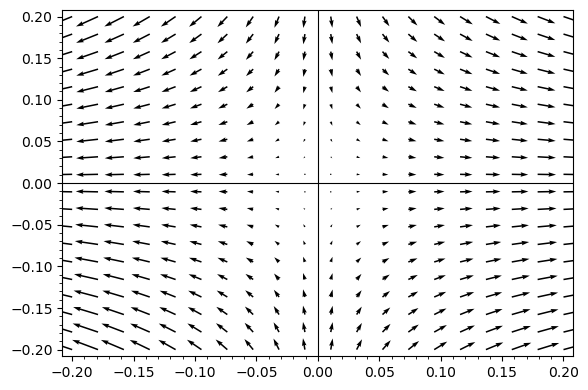

In [17]:
x, y = var('x y')
f = (2*x - x^2 - x*y, -y + x*y)
plot_vector_field((f[0], f[1]), (x, -0.2, 0.2), (y, -0.2, 0.2))

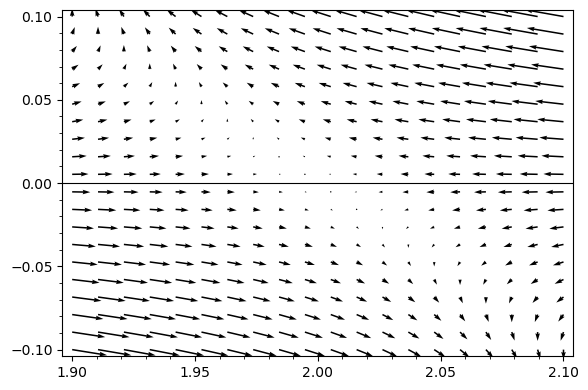

In [18]:
x, y = var('x y')
f = (2*x - x^2 - x*y, -y + x*y)
plot_vector_field((f[0], f[1]), (x, 1.9, 2.1), (y, -0.1, 0.1))

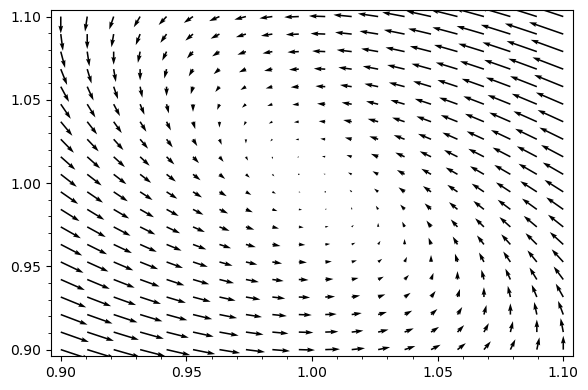

In [20]:
x, y = var('x y')
f = (2*x - x^2 - x*y, -y + x*y)
plot_vector_field((f[0], f[1]), (x, 0.9, 1.1), (y, 0.9, 1.1))

In [30]:
x, y = var('x y')
f = [y, -4*sin(x)]
f.subs(x = 0, y = 0)

AttributeError: 'list' object has no attribute 'subs'

In [33]:
x = var('x')
y = function('y')(x)
sol = desolve(diff(y, x) == -4*sin(x) / y, y)
sol = -8*sol
sol

y(x)^2 == -8*_C + 8*cos(x)

In [34]:
x, y = var('x y')
H = function('H')(x, y)
H(x, y) = y^2 - 8*cos(x)
diff(H, x)*y-4*diff(H, y)*sin(x)

(x, y) |--> 0

verbose 0 (163: primitive.py, options) WARNING: Ignoring option 'countours'=20
verbose 0 (163: primitive.py, options) 
The allowed options for ContourPlot defined by a 100 x 100 data grid are:
    cmap           the name of a predefined colormap,
                        a list of colors, or an instance of a
                        matplotlib Colormap. Type: import matplotlib.cm;
                        matplotlib.cm.datad.keys()
                        for available colormap names.
    colorbar       Include a colorbar indicating the levels                    
    colorbar_optionsa dictionary of options for colorbars                       
    contours       Either an integer specifying the number of
                        contour levels, or a sequence of numbers giving
                        the actual contours to use.
    fill           Fill contours or not                                        
    label_options  a dictionary of options for the labels                      
    la

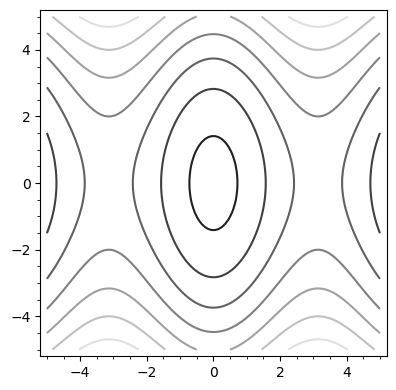

In [36]:
contour_plot(H, (-5, 5), (-5, 5), fill = false, countours = 20)

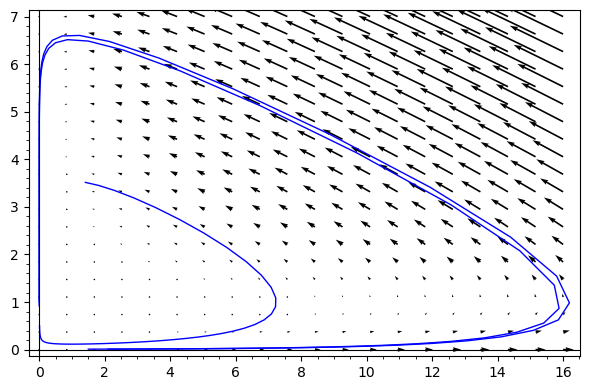

In [38]:
f = (x - x*y, -0.3*y + 0.3*x*y)
time =srange(0, 10, 0.1)
p = plot_vector_field((f[0], f[1]), (x, 0, 16), (y, 0, 7))
for ics in [(0.01, 0.5), (2.1, 0.01), (1.5, 0.01)]:
    sol = desolve_odeint(f, ics, time, [x, y])
    p += line(zip(sol[:,0], sol[:,1]))
p